In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


У нас есть датасет с данными по самоубийствам, с полями:
- Пол
- Возраст
- Количество суицидов
- Население
- Количество суидицов на 100 тысяч людей
- Год
- Human Development Index для года
- ВВП в этот год
- ВВП на душу населения
- классификация поколения

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


у нас очень мало данных для индекса человеческого развития, с пропусками надо бороться. Для HDI я бы предложил следующую стратегию: брать HDI от стран с похожим ВВП на душу населения.

In [5]:
data[data['HDI for year'].isnull() == True]

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27755,female,75+ years,7,318983,2.19,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
27756,female,35-54 years,65,3263931,1.99,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers
27757,female,55-74 years,15,1105076,1.36,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
27758,male,5-14 years,37,2805898,1.32,Uzbekistan2009,NaN,"33,689,223,673",1332,Generation Z


Для дальнейщей работы с датасетом я предлагаю разбить country-year на два отдельных признаках: страна и год

In [6]:
def country(col):
    return col[:-4]

def year(col):
    return col[-4:]

data['country'] = data['country-year'].apply(country)
data['year'] = data['country-year'].apply(year)
del(data['country-year'])

In [7]:
hdi = data[data['HDI for year'].isnull() == True]

# Я тут буду получать группы "страна-год" для дальнейщей работы с подстановкой
hdi_groups = []

for key in hdi.groupby(['country', 'year']).groups.keys():
    hdi_groups.append(key)

In [8]:
# Теперь для каждой группы мы проставим gdp_per_capita

hdi_embend = []

for x in hdi_groups:
    new_element = []
    new_element.append(x[0])
    new_element.append(x[1])
    new_element.append(data[(data['country'] == x[0]) & (data['year'] == x[1])]['gdp_per_capita ($)'].iloc[0])
    hdi_embend.append(new_element)
    
hdi_embend

[['Albania', '1987', 796],
 ['Albania', '1988', 769],
 ['Albania', '1989', 833],
 ['Albania', '1992', 251],
 ['Albania', '1993', 437],
 ['Albania', '1994', 697],
 ['Albania', '1996', 1127],
 ['Albania', '1997', 793],
 ['Albania', '1998', 899],
 ['Albania', '1999', 1127],
 ['Albania', '2001', 1451],
 ['Albania', '2002', 1573],
 ['Albania', '2003', 2021],
 ['Albania', '2004', 2544],
 ['Albania', '2006', 3235],
 ['Albania', '2007', 3863],
 ['Albania', '2008', 4672],
 ['Albania', '2009', 4387],
 ['Antigua and Barbuda', '1985', 3850],
 ['Antigua and Barbuda', '1986', 4740],
 ['Antigua and Barbuda', '1987', 5595],
 ['Antigua and Barbuda', '1988', 6693],
 ['Antigua and Barbuda', '1989', 7407],
 ['Antigua and Barbuda', '1990', 7744],
 ['Antigua and Barbuda', '1991', 7976],
 ['Antigua and Barbuda', '1992', 8087],
 ['Antigua and Barbuda', '1993', 8453],
 ['Antigua and Barbuda', '1994', 9062],
 ['Antigua and Barbuda', '1995', 8636],
 ['Antigua and Barbuda', '1998', 10078],
 ['Antigua and Barbuda'

In [9]:
# найдем все группы HDI - ВВП на душу населения

hdi = data[data['HDI for year'].isnull() == False].groupby('gdp_per_capita ($)').groups.keys()
hdi = list(hdi)

In [10]:
# теперь напишем функцию, которая находит ближайщее число

def close_number(num):
    global hdi
    
    last = hdi[0]
    
    for x in hdi:
        if num < x:
            if (x - num) > (num - last):
                return last
            else:
                return x
        
        if num == x:
            return num
        
        last = x

In [11]:
# почти все готово для закрытия пропусков в HDI

def fill_hdi(row):
    global data
    if row['HDI for year'] != row['HDI for year']:
        close = close_number(row['gdp_per_capita ($)'])
        row['HDI for year'] = data[(data['gdp_per_capita ($)'] == close) & (data['HDI for year'].isnull() == False)]['HDI for year'].iloc[0] 
    
    return row

data = data.apply(fill_hdi, axis=1)

In [12]:
data

,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year
0,male,15-24 years,21,312900,6.71,0.619,"2,156,624,900",796,Generation X,Albania,1987
1,male,35-54 years,16,308000,5.19,0.619,"2,156,624,900",796,Silent,Albania,1987
2,female,15-24 years,14,289700,4.83,0.619,"2,156,624,900",796,Generation X,Albania,1987
3,male,75+ years,1,21800,4.59,0.619,"2,156,624,900",796,G.I. Generation,Albania,1987
4,male,25-34 years,9,274300,3.28,0.619,"2,156,624,900",796,Boomers,Albania,1987
...,...,...,...,...,...,...,...,...,...,...,...
27815,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X,Uzbekistan,2014
27816,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent,Uzbekistan,2014
27817,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z,Uzbekistan,2014
27818,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z,Uzbekistan,2014


In [13]:
# save data очень долго считается дата в предыдущем пункте
save_data = data.copy()

Проверим есть ли еще где-то пропуски

In [14]:
save_data[save_data['generation'].isnull() == True]

,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year


Других пропусков нет

In [15]:
save_data

,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year
0,male,15-24 years,21,312900,6.71,0.619,"2,156,624,900",796,Generation X,Albania,1987
1,male,35-54 years,16,308000,5.19,0.619,"2,156,624,900",796,Silent,Albania,1987
2,female,15-24 years,14,289700,4.83,0.619,"2,156,624,900",796,Generation X,Albania,1987
3,male,75+ years,1,21800,4.59,0.619,"2,156,624,900",796,G.I. Generation,Albania,1987
4,male,25-34 years,9,274300,3.28,0.619,"2,156,624,900",796,Boomers,Albania,1987
...,...,...,...,...,...,...,...,...,...,...,...
27815,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X,Uzbekistan,2014
27816,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent,Uzbekistan,2014
27817,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z,Uzbekistan,2014
27818,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z,Uzbekistan,2014


# Работаем с категориальными данными

Данные пола можно преобразовать в ноль или единица (единица - мужчины, нет, я не сексист)

In [16]:
def male(sex):
    if sex == 'male':
        return 1
    else:
        return 0
    
save_data['sex'] = save_data['sex'].apply(male)

Возраст заменив цифрами - средним в интервале

In [17]:
save_data['age'].value_counts()

55-74 years    4642
35-54 years    4642
75+ years      4642
15-24 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

In [18]:
def age(a):
    gr = {'5-14 years': 10, '15-24 years': 20, '25-34 years': 30, '35-54 years': 45, '55-74 years': 65, '75+ years': 80}
    
    return gr[a]

save_data['age'] = save_data['age'].apply(age)

In [19]:
save_data['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

Признаков поколений немного, давайте ohe-hot-encoding

In [20]:
def ohe(row):
    gens = ['Generation X', 'Silent', 'Millenials', 'Boomers', 'G.I. Generation', 'Generation Z']
    
    for x in gens:
        if x == row['generation']:
            row[x] = 1
        else:
            row[x] = 0
    
    del(row['generation'])
    
    return row

save_data = save_data.apply(ohe, axis = 1)
     

In [21]:
save_data

,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),country,year,Generation X,Silent,Millenials,Boomers,G.I. Generation,Generation Z
0,1,20,21,312900,6.71,0.619,"2,156,624,900",796,Albania,1987,1,0,0,0,0,0
1,1,45,16,308000,5.19,0.619,"2,156,624,900",796,Albania,1987,0,1,0,0,0,0
2,0,20,14,289700,4.83,0.619,"2,156,624,900",796,Albania,1987,1,0,0,0,0,0
3,1,80,1,21800,4.59,0.619,"2,156,624,900",796,Albania,1987,0,0,0,0,1,0
4,1,30,9,274300,3.28,0.619,"2,156,624,900",796,Albania,1987,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0,45,107,3620833,2.96,0.675,"63,067,077,179",2309,Uzbekistan,2014,1,0,0,0,0,0
27816,0,80,9,348465,2.58,0.675,"63,067,077,179",2309,Uzbekistan,2014,0,1,0,0,0,0
27817,1,10,60,2762158,2.17,0.675,"63,067,077,179",2309,Uzbekistan,2014,0,0,0,0,0,1
27818,0,10,44,2631600,1.67,0.675,"63,067,077,179",2309,Uzbekistan,2014,0,0,0,0,0,1


Что еще нужно сделать, но я не успеваю:
- ванхоткоднуть страны
- нормализовать года: 1 самый ранний и до последнего (так коэффициент будет более "целым" :)

In [22]:
save_data = save_data.join(pd.get_dummies(save_data['country']))

# Выкидываем данные

Есть ряд однозначных кандидатур на удаление из датасета до выяснения корреляций и т.п.

Количество судицидов и популуция уже заложены в целевом признаке, они нам не нужны

Т.к. я не успеваю обработать страну, то выкину ее из дата сета (сорян, страна)

И вероятно надо выкинуть ВВП за год, на душу населения будет получше, но дадим шанс 

In [23]:
del(save_data['country'])
del(save_data['population'])
del(save_data['suicides_no'])

# Нормализация данных

In [24]:
# перед нормализацией надо конвертировать данные ВВП в целые числа (процессинг от склеарн валится с ошибкой без этого)

def to_int(col):
    return int(col.replace(',', ''))

save_data[" gdp_for_year ($) "] = save_data[" gdp_for_year ($) "].apply(to_int) 

In [25]:
# нормализуем

In [66]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()

df = save_data.copy()
del(df['suicides/100k pop'])

np_scaled = min_max_scaler.fit_transform(df) 
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = df.columns

In [67]:
df_normalized = df_normalized.join(save_data['suicides/100k pop'])

# Корреляция

Профайлер умирает, если ему закинуть все параметры, поэтому закидываю все, кроме стран

In [68]:
corr_df = df_normalized[['suicides/100k pop','sex','age', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
                        'year', 'Generation X', 'Silent', 'Millenials', 'Boomers', 'G.I. Generation', 'Generation Z']] 

corr_df

,suicides/100k pop,sex,age,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,Generation X,Silent,Millenials,Boomers,G.I. Generation,Generation Z
0,6.71,1.0,0.142857,0.295011,0.000116,0.004322,0.064516,1.0,0.0,0.0,0.0,0.0,0.0
1,5.19,1.0,0.500000,0.295011,0.000116,0.004322,0.064516,0.0,1.0,0.0,0.0,0.0,0.0
2,4.83,0.0,0.142857,0.295011,0.000116,0.004322,0.064516,1.0,0.0,0.0,0.0,0.0,0.0
3,4.59,1.0,1.000000,0.295011,0.000116,0.004322,0.064516,0.0,0.0,0.0,0.0,1.0,0.0
4,3.28,1.0,0.285714,0.295011,0.000116,0.004322,0.064516,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2.96,0.0,0.500000,0.416486,0.003478,0.016320,0.935484,1.0,0.0,0.0,0.0,0.0,0.0
27816,2.58,0.0,1.000000,0.416486,0.003478,0.016320,0.935484,0.0,1.0,0.0,0.0,0.0,0.0
27817,2.17,1.0,0.000000,0.416486,0.003478,0.016320,0.935484,0.0,0.0,0.0,0.0,0.0,1.0
27818,1.67,0.0,0.000000,0.416486,0.003478,0.016320,0.935484,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
from pandas_profiling import ProfileReport
ProfileReport(corr_df)

- Очевидно, что возраст, год и  поколение коррелируют, в сущности можно убрать год и возраст и оставить только поколение.
- ВВП и ВВП на душу населения сильно коррелируют, предлагаю все-таки убрать ВВП
- HDI очень сильно коррелирует с ВВП, что вообщем-то неудивительно учитывая способ которым мы его заполнили :) Вероятно это не самый лучший подход к заполнению пропусков.
- Очень сильная корреляция суицидов к полу, а именно к мужикам. Мужчины убивают себя гораздо чаще похоже

In [53]:
# убираем ВВП
del(df_normalized[' gdp_for_year ($) '])

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
y = df_normalized['suicides/100k pop']
X = df_normalized.copy()
del(X['suicides/100k pop'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 3
)

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.5022924421372721

In [69]:
# Плохая модель, выкинем страны
y = corr_df['suicides/100k pop']
X = corr_df.copy()
del(X['suicides/100k pop'])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 3
)

model = LinearRegression()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.2958187107296034

Выкинуть страны было не лучшей идей

In [82]:
y = corr_df['suicides/100k pop']
X = corr_df.copy()
del(X['HDI for year'])
del(X['suicides/100k pop'])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 3
)

model = LinearRegression()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.29333271013789286

Вообщем первая модель была хороша, попробуем только еще выкинуть возраст и поколение

In [88]:
y = df_normalized['suicides/100k pop']
X = df_normalized.copy()
del(X['suicides/100k pop'])
del(X['year'])
del(X['age'])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 3
)

model = LinearRegression()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.4877826889797381

чуть ухудшило модель. Итого мы имеем модель, которая довольно плохо предсказывает количество суицидов, но в тоже время мы сделали огромную работу, чтобы получить такие результаты, если бы мы не обрабатывали данные, не заполняли пробелы, то р-ты были бы гораздо хуже.

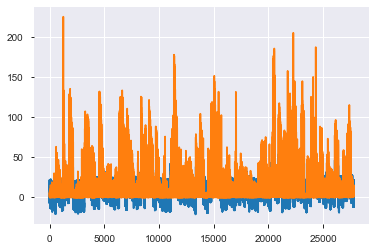

In [92]:
from matplotlib import pyplot as plt

predicted_y = X.apply(lambda x: sum(x * model.coef_) + model.intercept_, axis = 1)

plt.plot(predicted_y) #СИНИЙ
plt.plot(y) #ОРАНЖЕВЫЙ